In [1]:
import sys
sys.path.append("../")

import numpy as np
import itertools
from dataclasses import dataclass, field
from typing import Optional
from rl.chapter9.order_book import *
from rl.markov_process import *
from rl.distribution import Choose, Distribution, Gaussian, SampledDistribution, Poisson

ModuleNotFoundError: No module named 'numpy'

In [ ]:
@dataclass(frozen=True)
class OrderBookSimulator(MarkovProcess):
    transitions : Dict[str, Distribution]
    num_orders : int
    order_types : List[str]
    order_weights : List[float]

    def transition(self, state: OrderBook) -> Optional[Distribution[OrderBook]]:
        if not state.ascending_asks or not state.descending_bids:
            return None

        next_states = []
        for _ in range(self.num_orders):
            order_type = np.random.choice(self.order_types, p=self.order_weights)
            
            if order_type == 'market-buy':
                _, next_state = state.buy_market_order(shares=self.transitions['market-shares'].sample())

            elif order_type == 'market-sell':
                _, next_state = state.sell_market_order(shares=self.transitions['market-shares'].sample())
            
            elif order_type == 'limit-buy':
                _, next_state = state.buy_limit_order(price=self.transitions['limit-price'].sample(), shares=self.transitions['limit-shares'].sample())
            
            elif order_type == 'limit-sell':
                _, next_state = state.sell_limit_order(price=self.transitions['limit-price'].sample(), shares=self.transitions['limit-shares'].sample())

            next_states.append(next_state)
        
        return Choose(next_states)

OrderBook(descending_bids=[DollarsAndShares(dollars=65.11, shares=57), DollarsAndShares(dollars=62.21, shares=25), DollarsAndShares(dollars=28.45, shares=119), DollarsAndShares(dollars=27.01, shares=64), DollarsAndShares(dollars=23.6, shares=77)], ascending_asks=[DollarsAndShares(dollars=30.05, shares=64), DollarsAndShares(dollars=33.52, shares=103), DollarsAndShares(dollars=40.27, shares=73), DollarsAndShares(dollars=46.99, shares=87), DollarsAndShares(dollars=64.27, shares=85)])


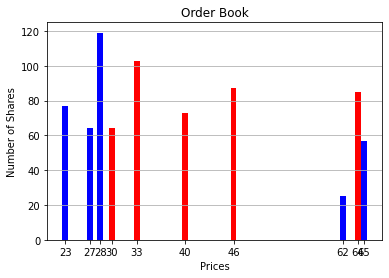

In [ ]:
num_asks = 5
num_bids = 5

prices : Sequence[float] = np.abs(np.random.normal(loc=50.0, scale=15, size=num_asks))
shares : Sequence[int] = np.random.randint(10, 120, size=num_asks)

asks_list = sorted([DollarsAndShares(dollars=round(p, 2), shares=s) for p, s in zip(prices, shares)], key=lambda x : x.dollars)

prices : Sequence[float] = np.abs(np.random.normal(loc=50.0, scale=15, size=num_asks))
shares : Sequence[int] = np.random.randint(10, 120, size=num_asks)

bids_list = sorted([DollarsAndShares(dollars=round(p, 2), shares=s) for p, s in zip(prices, shares)], key=lambda x : x.dollars, reverse=True)



book : OrderBook = OrderBook(descending_bids=bids_list, ascending_asks=asks_list)
print(book)
book.display_order_book()

In [ ]:
transitions = {'market-shares' : Poisson(20),
            #    'market-shares' : Gaussian(20, 4).apply(lambda x : abs(int(x))), 
               'limit-price' : SampledDistribution(sampler=np.random.uniform(40, 61)), 
               'limit-shares' : SampledDistribution(sampler=np.random.randint(30, 41))}

simulator = OrderBookSimulator(transitions=transitions, num_orders=10, order_types=['market-buy', 'market-sell', 'limit-buy', 'limit-sell'], order_weights=[0.25] * 4)

In [ ]:
print(transitions['market-shares'].sample())

16


In [ ]:
ob_traces = [state for state in simulator.simulate(start_state_distribution=Choose([book]))]

In [ ]:
for ob in ob_traces:
    print(ob)
    print()

# print(simulator.transition(book).sample())

OrderBook(descending_bids=[DollarsAndShares(dollars=65.11, shares=57), DollarsAndShares(dollars=62.21, shares=25), DollarsAndShares(dollars=28.45, shares=119), DollarsAndShares(dollars=27.01, shares=64), DollarsAndShares(dollars=23.6, shares=77)], ascending_asks=[DollarsAndShares(dollars=30.05, shares=64), DollarsAndShares(dollars=33.52, shares=103), DollarsAndShares(dollars=40.27, shares=73), DollarsAndShares(dollars=46.99, shares=87), DollarsAndShares(dollars=64.27, shares=85)])

